In [281]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [282]:
def add_list_to_dic(dict,l,check):
    if check:
        count = -1
    else: 
        count = 1
    for x in l:
        if x in dict:
            dict[x] += count
        else:
            dict[x] = count
    return dict

In [283]:
df = pd.read_csv('congress_twitter_117th_house.csv', sep=',', header=0)
df_D = df[df['Party'].str.contains('D')]
df_R = df[df['Party'].str.contains('R')]
house_list_D = df_D['State'].tolist()
house_list_R = df_R['State'].tolist()

In [284]:
df = pd.read_csv('congress_twitter_117th_senate.csv', sep=',', header=0)
df_D = df[df['Party '].str.contains('D')]
df_R = df[df['Party '].str.contains('R')]
senate_list_D = df_D['State'].tolist()
senate_list_R = df_R['State'].tolist()

In [285]:
senate_dict = dict()
senate_dict= add_list_to_dic(senate_dict,senate_list_D,True)
senate_dict= add_list_to_dic(senate_dict,senate_list_R,False)
senate_data =[]
for key in senate_dict.keys():
    senate_data.append([key,senate_dict[key]])
    
house_dict = dict()
house_dict= add_list_to_dic(house_dict,house_list_D,True)
house_dict= add_list_to_dic(house_dict,house_list_R,False)
house_data =[]
for key in house_dict.keys():
    house_data.append([key,house_dict[key]])

In [286]:
df = pd.DataFrame(senate_data, columns=['state', 'value'])

fig1 = px.choropleth(df, locations='state', locationmode='USA-states',
                    color='value', scope='usa', color_continuous_scale='RdYlbu')

df = pd.DataFrame(house_data, columns=['state', 'value'])

fig2 =px.choropleth(df, locations='state', locationmode='USA-states',
                    color='value', scope='usa', color_continuous_scale='RdYlbu')

fig1.update_layout(title={'text': 'Senate Distribution by State', 'x': 0.5},width=800, height=600,coloraxis_colorbar_title='Senate party')
fig1.update_layout(coloraxis_colorbar_len=0.5)
fig1.show()

fig2.update_layout(title={'text': 'House Distribution by State', 'x': 0.5},width=800, height=600,coloraxis_colorbar_title='House party')
fig2.update_layout(coloraxis_colorbar_len=0.5)
fig2.show()


In [287]:
def reverse_name(s):
    words = s.split(' ')
    reversed_words = words[::-1]
    reversed_string = ' '.join(reversed_words)
    return  reversed_string

In [288]:
df1 = pd.read_csv('congress_twitter_117th_house.csv', sep=',', header=0)
df2 = pd.read_csv('congress_twitter_117th_senate.csv', sep=',', header=0)
df2 = df2.rename(columns={'Party ': 'Party'})
df = pd.concat([df1, df2])
df = df.applymap(lambda x: x.replace(',', ''))
df = df.applymap(lambda x: reverse_name(x) )
df.head()
print(len(df))

530


In [289]:
with open("raw_user_profiles", "rb") as raw_timeline_file:
    user_df = pd.read_pickle(raw_timeline_file)

user_df['display_name'] = user_df['display_name'].str.replace('Rep.','')
user_df['display_name'] = user_df['display_name'].str.replace(',','')
user_df['display_name'] = user_df['display_name'].str.replace('.',' ')
user_df = user_df.rename(columns= {'display_name':'Name'})
user_df.head(1)
print(len(user_df))

583


/var/folders/n_/8gt809p93q5bs3ts1z8by0s00000gn/T/ipykernel_44375/3934209713.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/n_/8gt809p93q5bs3ts1z8by0s00000gn/T/ipykernel_44375/3934209713.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [290]:
name_list = user_df['Name'].tolist()
name_list2 = df['Name'].tolist()

name_dict = dict()
for x in name_list2:
    for y in name_list:
        if x in y or x==y:
            name_dict[y] =x
            break
        
user_df['Name'] = user_df['Name'].map(name_dict)

In [291]:
merge =user_df.merge(df, left_on='Name', right_on='Name', how='inner')
print(merge[['Name','Party','followers_count','State']])

               Name Party  followers_count State
0       Marc Veasey     R            33038    TX
1     Jay Obernolte     R             8881    CA
2        Joni Ernst     R           157443    IA
3      Kweisi Mfume     D             4891    MD
4       Kevin Brady     R            57491    TX
..              ...   ...              ...   ...
388    Marie Newman     D            49372    IL
389    Brian Schatz     D            55824    HI
390  Sharice Davids     D            70334    KS
391     Brian Babin     R            27438    TX
392      Rick Scott     R           438407    FL

[393 rows x 4 columns]


In [292]:
num_df = merge[['State','Party','followers_count']].groupby(['State','Party']).sum()
num_df = num_df.reset_index()
num_df['combine'] = num_df[['State','Party', 'followers_count']].values.tolist()

follower_count_dict =dict()
for x in num_df['combine'].tolist():
    check = -1
    if x[1] == 'D':
        check = 1
    if x[0] in follower_count_dict:
        follower_count_dict[x[0]] += check* x[2]
    else:
        follower_count_dict[x[0]] = check* x[2]
        
follower_data =[]
for key in follower_count_dict.keys():
    follower_data.append([key,follower_count_dict[key]])

In [293]:
df = pd.DataFrame(follower_data, columns=['state', 'value'])

fig1 = px.choropleth(df, locations='state', locationmode='USA-states',
                    color='value', scope='usa', color_continuous_scale='RdYlbu')


fig1.update_layout(title={'text': 'Senate Distribution by State', 'x': 0.5},width=800, height=600,coloraxis_colorbar_title='Number of followers')
fig1.update_layout(coloraxis_colorbar_len=0.5)
fig1.show()


In [294]:
with open("raw_user_profiles", "rb") as raw_timeline_file:
    user_df = pd.read_pickle(raw_timeline_file)

add_group = lambda row: 'R' if 'Rep.' in row['display_name'] else 'D'
user_df['Party'] = user_df.apply(add_group, axis=1)

user_df = user_df[user_df['display_name'].str.contains('Rep.')]
print(len(user_df))

user_df = user_df[user_df['Party'].str.contains('R')]
print(len(user_df))

user_df[['user_name','display_name','followers_count','link','Party']].head()


229
219


,user_name,display_name,followers_count,link,Party
0,RepVeasey,Rep. Marc Veasey,33038,https://veasey.house.gov/,R
2,JayObernolte,Rep. Jay Obernolte,8881,http://obernolte.house.gov,R
6,RepSamGraves,Rep. Sam Graves,15900,http://graves.house.gov,R
8,RepSpartz,Rep. Victoria Spartz,29845,https://spartz.house.gov,R
10,RepJohnLarson,Rep. John Larson,28702,http://larson.house.gov,R


In [295]:
followers_list = user_df['followers_count'].tolist()
user_df.head(10)

229

229

In [296]:
followers_list.sort()
print(followers_list[-10:])

[698563, 731604, 770117, 876030, 1297015, 1303544, 1479438, 2009755, 2259122, 3851965]


/var/folders/n_/8gt809p93q5bs3ts1z8by0s00000gn/T/ipykernel_44375/3815016485.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot: ylabel='Density'>

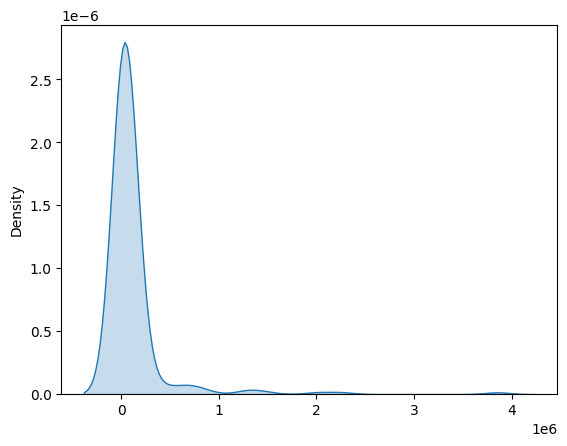

In [297]:
sns.kdeplot(followers_list,shade=True)

In [298]:
user_df.to_csv('user.csv', index=False)

In [299]:
with open("raw_tweets", "rb") as raw_timeline_file:
    tweet_df = pd.read_pickle(raw_timeline_file)

In [ ]:
tweet_df.head()

,id,url,user_name,content,creation_date,reply_count,retweet_count,like_count,quote_count,view_count,...,context_source_url,context_source_label,context_links,context_media_types,context_reply_tweet_id,context_reply_user_name,context_hashtags,context_cashtags,context_vibe_text,context_types
0,1631755145187827715,https://twitter.com/RepVeasey/status/163175514...,RepVeasey,I applaud North Carolina’s announcement to exp...,2023-03-03 20:35:17+00:00,0,6,6,0,390,...,None,None,None,None,None,None,None,None,None,None
1,1631703850624204801,https://twitter.com/RepVeasey/status/163170385...,RepVeasey,I’m so proud to have the Young Men’s Leadershi...,2023-03-03 17:11:28+00:00,1,1,5,0,259,...,None,None,None,None,None,None,None,None,None,None
2,1631693313257373703,https://twitter.com/RepVeasey/status/163169331...,RepVeasey,Happy Women’s History Month! When women succee...,2023-03-03 16:29:35+00:00,0,2,3,0,399,...,None,None,None,None,None,None,None,None,None,None
3,1631411075034882049,https://twitter.com/RepVeasey/status/163141107...,RepVeasey,"Stay safe out there, North Texas!",2023-03-02 21:48:05+00:00,1,1,4,0,1174,...,http://twitter.com/#!/download/ipad,Twitter for iPad,[],[VIDEO],None,None,"[dfwwx, ctxwx, txwx]",[],None,QUOTE
4,1631402414300340224,https://twitter.com/RepVeasey/status/163140241...,RepVeasey,Wishing my fellow Texans everywhere a happy Te...,2023-03-02 21:13:40+00:00,1,2,8,0,413,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
tweet_df['context_language'].unique

In [ ]:
user_df.columns
user_df['user_name'].count()

In [ ]:
tweet_df.groupby(['user_name']).count()

In [ ]:
tweet_df.columns

In [ ]:
n_df  =tweet_df.where(tweet_df['context_language']=='zxx')

In [ ]:
len(n_df['url'].unique())

In [ ]:
n_df= tweet_df[['user_name','reply_count','retweet_count','like_count','context_language']]
n_df.groupby(['context_language']).count().sort_values(['reply_count'],ascending=False)

In [ ]:
n_df= tweet_df[['user_name','reply_count','retweet_count','like_count','view_count']]
nan_rows = n_df[n_df.isna().any(axis=1)]
non_nan_rows = n_df[n_df.notna().all(axis=1)]


In [ ]:
non_view_count = nan_rows.shape[0]
view_count = non_nan_rows.shape[0]
print('no view count / view count = ', non_view_count/view_count)
print('nomarly the view_count is unknown')

In [ ]:
average_df = n_df.groupby(['user_name']).mean()
average_df = average_df.sort_values(['reply_count'],ascending=False)
average_df.head(20)

In [ ]:
n_df= tweet_df[['user_name','creation_date','reply_count','retweet_count','like_count','view_count']]
n_df['creation_date'] = pd.to_datetime(n_df['creation_date']).dt.date

In [ ]:
n_df.groupby(['creation_date','user_name']).count().sort_values(['reply_count'],ascending=False)